In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op
import warnings
warnings.filterwarnings(action = 'ignore')
from IPython.display import display
seed = 21

In [2]:
UserActivity = pd.read_csv("UserActivity.csv")
Users = pd.read_csv("Users.csv")
SampleSubmission = pd.read_csv("SampleSubmission.csv")

In [3]:
#Remove all "$" and add "_" in between spaces to the activities
def remove_id(x):
    x = x.replace('$', '')
    if 'ID' in x:
        return "_".join(x.split('_')[:-1])
    
    return x.replace(' ', '_')

In [4]:
UserActivity.Title.apply(remove_id).value_counts()

Viewed_All_Competitions                 58176
comp_ID                                 55540
Viewed_All_Discussions                  47172
Viewed_All_Learning_Pages               22930
Downloaded_Competition_Datafile         19578
Updated_Profile                         14748
Created_Submission                      13649
identify                                12339
Signed_Up                               10862
create_alias                             9346
badge_OCZE                               8864
Confirmed_Email                          8818
Updated_Discussion                       6498
Joined_Competition                       6086
Viewed_All_Jobs                          4139
Signed_In                                4100
Updated_Submission                       2929
blog_ID                                  2712
badge_HYIO                               1760
Signed_Out                               1660
job_ID                                   1492
Viewed_Discussion                 

In [5]:
#Add new column as the type of activity performed
UserActivity['main_activities'] = UserActivity.Title.apply(remove_id)
UserActivity.main_activities.unique()

array(['comp_ID', 'job_ID', 'blog_ID', 'create_alias', 'identify',
       'Signed_Up', 'Viewed_All_Competitions', 'Viewed_All_Discussions',
       'Viewed_All_Learning_Pages', 'Confirmed_Email',
       'Joined_Competition', 'Downloaded_Competition_Datafile',
       'Signed_In', 'Updated_Discussion', 'Joined_Team',
       'Created_Submission', 'Viewed_Discussion', 'Updated_Submission',
       'Signed_Out', 'badge_OCZE', 'Updated_Profile', 'Viewed_FAQ',
       'Viewed_All_Jobs', 'Created_Team', 'Invited_Member_To_Team',
       'Updated_Team', 'Updated_Comment',
       'Updated_Discussion_Team_Participants', 'badge_HYIO', 'badge_MLPD',
       'Applied_To_Job', 'Votes_(Up/Down)', 'Transferred_Team_Leadership',
       'badge_PLDS', 'Changed_Password', 'Deleted_Team',
       'Accepted_Team_Leadership_Transfer',
       'Revoked_Team_Leadership_Transfer', 'Report_Something',
       'Kicked_Member_From_Team', 'Left_Team'], dtype=object)

In [6]:
act_vc = UserActivity.main_activities.value_counts()
#Ignore activities with <= 1000 count
selected_activities = act_vc[act_vc > 1000].keys()
selected_activities

Index(['Viewed_All_Competitions', 'comp_ID', 'Viewed_All_Discussions',
       'Viewed_All_Learning_Pages', 'Downloaded_Competition_Datafile',
       'Updated_Profile', 'Created_Submission', 'identify', 'Signed_Up',
       'create_alias', 'badge_OCZE', 'Confirmed_Email', 'Updated_Discussion',
       'Joined_Competition', 'Viewed_All_Jobs', 'Signed_In',
       'Updated_Submission', 'blog_ID', 'badge_HYIO', 'Signed_Out', 'job_ID',
       'Viewed_Discussion'],
      dtype='object')

In [7]:
#Drop rows with activities not in the "selected_activities" list
UserActivity = UserActivity[UserActivity.main_activities.isin(selected_activities)].reset_index(drop=True)
UserActivity

,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month,main_activities
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22,comp_ID
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23,comp_ID
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23,comp_ID
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23,comp_ID
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23,comp_ID
...,...,...,...,...,...,...,...
314600,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14,job_ID
314601,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14,job_ID
314602,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20,job_ID
314603,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14,job_ID


In [8]:
#Group by User_ID, Activity Type and Month of activity
dataset = UserActivity.groupby(['User_ID', 'main_activities', 'datetime Month']).size().reset_index().\
    rename(columns={0: 'count'}).\
        sort_values(['User_ID', 'datetime Month', 'count'], ascending=False)

In [9]:
dataset

,User_ID,main_activities,datetime Month,count
111314,ID_ZZVUJ45W,Downloaded_Competition_Datafile,3,3
111318,ID_ZZVUJ45W,Viewed_All_Discussions,3,2
111313,ID_ZZVUJ45W,Confirmed_Email,3,1
111315,ID_ZZVUJ45W,Joined_Competition,3,1
111316,ID_ZZVUJ45W,Signed_Up,3,1
...,...,...,...,...
1,ID_000H9XOP,Viewed_All_Competitions,5,1
2,ID_000H9XOP,Viewed_All_Discussions,5,1
3,ID_000H9XOP,comp_ID,5,1
4,ID_000H9XOP,create_alias,5,1


In [10]:
#For graph
temp1 = dataset.groupby("datetime Month").sum()

In [11]:
temp1

,count
datetime Month,
1,58044
2,60542
3,55578
4,26615
5,56662
11,15179
12,41985


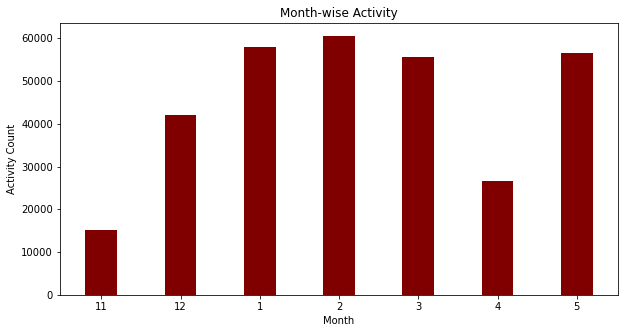

In [12]:
#Bar graph for Month-wise activity
fig = plt.figure(figsize = (10, 5))
courses = ["11", "12", "1", "2", "3", "4", "5"]
values = [15179, 41985, 58044, 60542, 55578, 26615, 56662]
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Activity Count")
plt.title("Month-wise Activity")
plt.show()

In [13]:
#All User_IDs
Selected_users = dataset[['User_ID']].drop_duplicates().reset_index(drop=True)
Selected_users

,User_ID
0,ID_ZZVUJ45W
1,ID_ZZUNZJ2U
2,ID_ZZQK0LU6
3,ID_ZZMHNLNT
4,ID_ZZJKFBR5
...,...
10395,ID_00ETFE7J
10396,ID_008D2J6C
10397,ID_004UKSJV
10398,ID_003YJHQA


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
#Label Encode all countries
Users.Countries_ID = Users.Countries_ID.fillna('unspecified')
Users.Countries_ID = le.fit_transform(Users.Countries_ID)

In [17]:
#Remove repeated User_IDs
user_df = pd.merge(Selected_users, Users, on='User_ID',  how='inner')

In [18]:
#Drop 'Created At time'and 'Created At Year'
user_df.drop(columns=['Created At time', 'Created At Year'], inplace=True)
user_df

,User_ID,FeatureX,FeatureY,Countries_ID,Created At Month,Created At Day_of_month
0,ID_ZZVUJ45W,0,0,146,3,5
1,ID_ZZUNZJ2U,0,0,146,2,30
2,ID_ZZQK0LU6,0,3,146,3,29
3,ID_ZZMHNLNT,0,0,146,4,1
4,ID_ZZJKFBR5,0,1,143,12,8
...,...,...,...,...,...,...
10395,ID_00ETFE7J,0,0,61,1,6
10396,ID_008D2J6C,0,0,60,1,7
10397,ID_004UKSJV,0,0,69,12,28
10398,ID_003YJHQA,0,1,60,4,12


In [19]:
all_activities = dataset.main_activities.unique()

In [20]:
#Add month number
month_cols = [f'datetime Month_{i}' for i in [1, 2, 3, 4, 5, 11, 12]]

In [21]:
#User_IDs from sample submission for test data
test_ids = SampleSubmission.User_ID_Next_month_Activity.str.replace('_Month_5', '').unique()

In [22]:
activity_df = user_df[['User_ID']]

In [23]:
#Month-wise activity for each user
for activity in all_activities:
    #Activity-wise dataframe
    _df = pd.get_dummies(
        dataset[dataset.main_activities == activity].drop(columns='main_activities').reset_index(drop=True),
        columns=['datetime Month'])
    for col in month_cols:
        if col not in _df.columns:
            _df[col] = 0
        #Multiply count of a particular activity to activity count of that month
        _df[col] *= _df['count']
    _df = _df.drop(columns='count')
    _df = _df.groupby('User_ID').sum().reset_index()
    #Merge each month data for an activity
    _df = pd.merge(user_df[['User_ID']], _df, on='User_ID', how='left')
    _df[month_cols] = _df[month_cols].fillna(0)
    #Activity and month based columns
    _df.columns = _df.columns.str.replace('datetime Month_', f'{activity}_month_')

    activity_df = pd.merge(activity_df, _df, on='User_ID', how='left')

In [24]:
activity_df

,User_ID,Downloaded_Competition_Datafile_month_1,Downloaded_Competition_Datafile_month_2,Downloaded_Competition_Datafile_month_3,Downloaded_Competition_Datafile_month_4,Downloaded_Competition_Datafile_month_5,Downloaded_Competition_Datafile_month_11,Downloaded_Competition_Datafile_month_12,Viewed_All_Discussions_month_1,Viewed_All_Discussions_month_2,...,Updated_Submission_month_5,Updated_Submission_month_11,Updated_Submission_month_12,badge_HYIO_month_5,badge_HYIO_month_1,badge_HYIO_month_2,badge_HYIO_month_3,badge_HYIO_month_4,badge_HYIO_month_11,badge_HYIO_month_12
0,ID_ZZVUJ45W,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_ZZUNZJ2U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_ZZQK0LU6,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_ZZMHNLNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_ZZJKFBR5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,ID_00ETFE7J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10396,ID_008D2J6C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10397,ID_004UKSJV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10398,ID_003YJHQA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
activity_df = pd.merge(activity_df, user_df, on='User_ID', how='left')

In [26]:
#Train and test dataframe using User_IDs in sample submission
train_df = activity_df[~activity_df.User_ID.isin(test_ids)].reset_index(drop=True)
test_df = activity_df[activity_df.User_ID.isin(test_ids)].reset_index(drop=True)

In [27]:
new_train = pd.DataFrame()

In [28]:
for i in range(len(train_df)):
    user = train_df.loc[i]
    created_month = user['Created At Month']
    if created_month < 5: #As there is month 11 after 5
        #Create dictionary for User_ID, user created month activity and Active
        user_dict = {}
        user_dict['User_ID'] = user['User_ID']
        for activity in all_activities:
            user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']
        #Next month of user created month
        next_month = [created_month+1, 1][created_month == 12]
        #Take Active as 1 if user has any activity in the next month of user created month
        user_dict['Active'] = [0, 1][user[[f'{activity}_month_{next_month}' for activity in all_activities]].sum() > 0]

        new_train = new_train.append(user_dict, ignore_index=True)

In [29]:
new_train

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Signed_Up,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,...,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO,Active
0,ID_ZZVUJ45W,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_ZZUNZJ2U,0.0,1.0,1.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_ZZQK0LU6,7.0,4.0,1.0,2.0,1.0,14.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_ZZHDXC1Q,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_ZYVA36JR,0.0,3.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,...,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,ID_01BEG5HQ,0.0,2.0,1.0,0.0,1.0,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5232,ID_011YM9VH,0.0,14.0,1.0,1.0,1.0,12.0,7.0,1.0,1.0,...,16.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
5233,ID_00SL0NNP,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5234,ID_00ETFE7J,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
#For graph
temp = new_train[all_activities]

In [31]:
k = temp.sum()
k

Downloaded_Competition_Datafile     7007.0
Viewed_All_Discussions             17629.0
Confirmed_Email                     4394.0
Joined_Competition                  2661.0
Signed_Up                           5365.0
Viewed_All_Competitions            20606.0
Viewed_All_Learning_Pages           9464.0
badge_OCZE                          4395.0
create_alias                        4588.0
identify                            5679.0
comp_ID                            14268.0
Signed_In                           1370.0
Updated_Discussion                  2030.0
Viewed_All_Jobs                     1732.0
job_ID                               654.0
Created_Submission                  4030.0
Signed_Out                           517.0
Updated_Profile                     5807.0
blog_ID                              748.0
Viewed_Discussion                    440.0
Updated_Submission                  1096.0
badge_HYIO                             0.0
dtype: float64

In [32]:
count = k.values

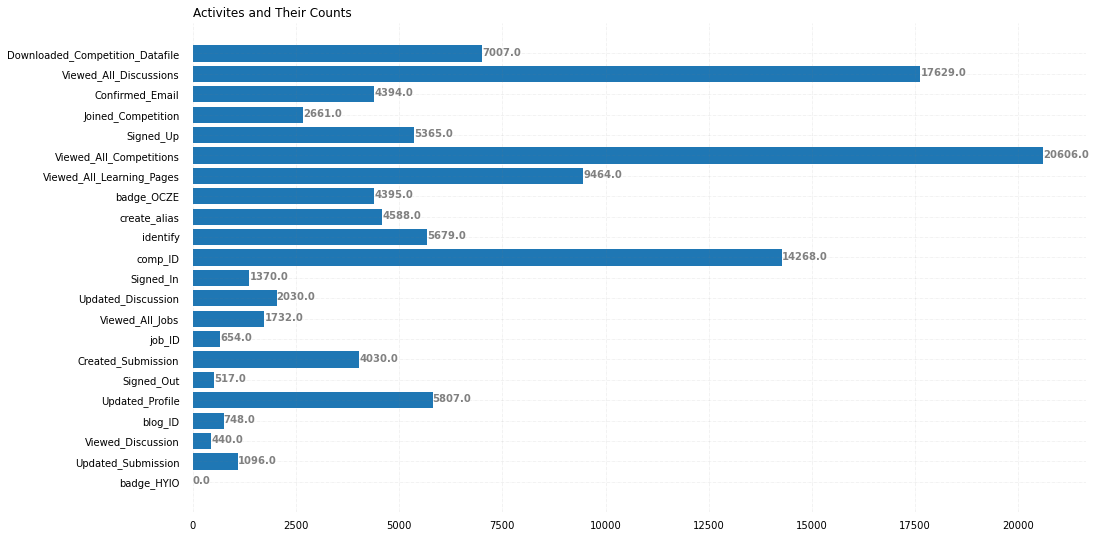

In [33]:
#Bar graph for activity based count
fig, ax = plt.subplots(figsize =(16, 9))
 
ax.barh(all_activities, count)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
ax.set_title('Activites and Their Counts',
             loc ='left', )
 
plt.show()

In [34]:
df_crit = new_train[["User_ID", "Active"]]

In [35]:
#Save criteria in a csv
df_crit.to_csv("CriteriaData.csv")

In [36]:
new_test = pd.DataFrame()

In [37]:
#Activity based grouping for all months
for i in range(len(test_df)):
    user = test_df.loc[i]
    created_month = user['Created At Month']
    user_dict = {}
    user_dict['User_ID'] = user['User_ID']
    for activity in all_activities:
        user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']

    new_test = new_test.append(user_dict, ignore_index=True)

In [38]:
new_test

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Signed_Up,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,...,Updated_Discussion,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO
0,ID_ZZMHNLNT,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_ZWDD4T41,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,ID_ZUVTLGY7,4.0,13.0,1.0,1.0,1.0,5.0,3.0,1.0,0.0,...,0.0,5.0,3.0,20.0,0.0,0.0,0.0,0.0,12.0,0.0
3,ID_ZT27LY0Q,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,ID_ZQM6PUGO,0.0,3.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,ID_04OT901K,2.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
734,ID_04GIS1QZ,0.0,2.0,1.0,0.0,1.0,7.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
735,ID_02F14MDW,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
736,ID_028JJTDW,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
new_train.Active.value_counts()

0.0    4319
1.0     917
Name: Active, dtype: int64

In [42]:
train_df = new_train.reset_index(drop=True)
test_df = new_test.reset_index(drop=True)

# MODEL TRAINING

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

In [44]:
main_cols = train_df.columns.difference([
    'User_ID', 'Active', 
])

In [45]:
X = train_df[main_cols]
y = train_df['Active']
test = test_df[main_cols]

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression(random_state=0, max_iter=40)

In [48]:
start = time.time()
clf = LogisticRegression(random_state=0, max_iter=40).fit(X, y)
end = time.time()

In [49]:
y_p = clf.predict(X)

In [50]:
f1_score(y, y_p)

0.20239190432382706

In [51]:
accuracy_score(y, y_p)

0.8344155844155844

In [52]:
print(end - start)

0.7540464401245117


In [53]:
op.countOf(clf.predict(test), 1)

11

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=10).fit(X, y)
end = time.time()

In [56]:
y_pred = neigh.predict(X)

In [57]:
f1_score(y, y_pred)

0.23669724770642203

In [58]:
accuracy_score(y, y_pred)

0.841100076394194

In [59]:
print(end - start)

0.004990100860595703


In [60]:
op.countOf(neigh.predict(test), 1)

22

## SVM

In [61]:
from sklearn.svm import SVC

In [62]:
start = time.time()
clf1 = SVC(kernel='rbf', gamma='scale').fit(X, y)
end = time.time()

In [63]:
y_pred = clf1.predict(X)

In [64]:
accuracy_score(y, y_pred)

0.8504583651642476

In [65]:
f1_score(y, y_pred)

0.2702702702702703

In [66]:
print(end - start)

1.0584168434143066


In [67]:
op.countOf(clf1.predict(test), 1)

11

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf2 = RandomForestClassifier(n_estimators=15).fit(X, y)

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [72]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
rf_random = RandomizedSearchCV(estimator = clf2, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [74]:
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=15),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [80, 293, 506, 720, 933,
                                                         1146, 1360, 1573, 1786,
                                                         2000]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 933,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80}

In [76]:
start = time.time()
clf2 = RandomForestClassifier(n_estimators=80, min_samples_split=2, 
                              min_samples_leaf=4, max_features='log2', 
                              max_depth=20).fit(X, y)
end = time.time()

In [77]:
y_pred = clf2.predict(X)

In [78]:
accuracy_score(y, y_pred)

0.8672650878533231

In [79]:
f1_score(y, y_pred)

0.40547476475620187

In [80]:
print(end - start)

0.3244004249572754


In [81]:
op.countOf(clf2.predict(test), 1)

19

## LightGBM

In [82]:
!pip install lightgbm


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from lightgbm import LGBMClassifier

In [84]:
clf = LGBMClassifier()

In [85]:
boosting_type = ["gbdt", "dart", "goss", "rf"]
num_leaves = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
learning_rate = [float(x) for x in np.arange(0, 1, 0.01)]
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]

In [86]:
random_grid = {'n_estimators': n_estimators,
               'boosting_type': boosting_type,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'num_leaves': num_leaves}

In [87]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [88]:
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'learning_rate': [0.0, 0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.07, 0.08, 0.09, 0.1,
                                                          0.11, 0.12, 0.13,
                                                          0.14, 0.15, 0.16,
                                                          0.17, 0.18, 0.19, 0.2,
                                                          0.21, 0.22, 0.23,
                                                          0.24, 0.25, 0.26,
                                                          0.27, 0.28, 0.29, ...],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [80, 293, 506, 720, 933,
                                                         1146, 1360, 1573, 1786,
                                                         2000],
                                        'num_leaves': [10, 120, 230, 340, 450,
                                                       560, 670, 780, 890,
                                                       1000]},
                   random_state=42, verbose=2)

In [89]:
rf_random.best_params_

{'num_leaves': 780,
 'n_estimators': 720,
 'max_depth': 100,
 'learning_rate': 0.24,
 'boosting_type': 'dart'}

In [90]:
start = time.time()
clf = LGBMClassifier(num_leaves=780, n_estimators=720, max_depth=100, learning_rate=0.24, boosting_type="dart").fit(X, y)
end = time.time()

In [91]:
y_pred = clf.predict(X)

In [92]:
accuracy_score(y, y_pred)

0.9608479755538579

In [93]:
f1_score(y, y_pred)

0.875832828588734

In [94]:
print(end - start)

19.853044986724854


In [95]:
op.countOf(clf.predict(test), 1)

73

## CatBoost

In [96]:
!pip install catboost


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from catboost import CatBoostClassifier, Pool

In [98]:
clf = CatBoostClassifier()

In [99]:
learning_rate = [float(x) for x in np.arange(0.5, 0.7, 0.001)]
depth = [int(x) for x in np.linspace(0, 20, num = 2)]
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]

In [100]:
random_grid = {'depth': depth,
               'learning_rate': learning_rate,
               'n_estimators': n_estimators}

In [101]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [102]:
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.4978615	total: 142ms	remaining: 11.2s
1:	learn: 0.4693080	total: 144ms	remaining: 5.62s
2:	learn: 0.4647969	total: 146ms	remaining: 3.74s
3:	learn: 0.4640411	total: 147ms	remaining: 2.8s
4:	learn: 0.4639140	total: 149ms	remaining: 2.23s
5:	learn: 0.4638942	total: 151ms	remaining: 1.86s
6:	learn: 0.4638923	total: 152ms	remaining: 1.59s
7:	learn: 0.4638847	total: 154ms	remaining: 1.38s
8:	learn: 0.4638818	total: 155ms	remaining: 1.22s
9:	learn: 0.4638820	total: 156ms	remaining: 1.09s
10:	learn: 0.4638820	total: 157ms	remaining: 988ms
11:	learn: 0.4638820	total: 159ms	remaining: 900ms
12:	learn: 0.4638820	total: 160ms	remaining: 826ms
13:	learn: 0.4638820	total: 162ms	remaining: 764ms
14:	learn: 0.4638820	total: 164ms	remaining: 709ms
15:	learn: 0.4638820	total: 165ms	remaining: 661ms
16:	learn: 0.4638820	total: 167ms	remaining: 618ms
17:	learn: 0.4638820	total: 168ms	remaining: 580ms
18:	learn: 0.4638820	total: 170m

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001FAA3C009D0>,
                   n_jobs=-1,
                   param_distributions={'depth': [0, 20],
                                        'learning_rate': [0.5, 0.501, 0.502,
                                                          0.503, 0.504, 0.505,
                                                          0.506, 0.507, 0.508,
                                                          0.509, 0.51, 0.511,
                                                          0.512, 0.513, 0.514,
                                                          0.515, 0.516, 0.517,
                                                          0.518, 0.519, 0.52,
                                                          0.521, 0.522, 0.523,
                                                          0.524, 0.525, 0.526,
                                                          0.527, 0.528, 0.529, ...],
                                        'n_estimators': [80, 293, 506, 720, 933,
                                                         1146, 1360, 1573, 1786,
                                                         2000]},
                   random_state=42, verbose=2)

In [103]:
rf_random.best_params_

{'n_estimators': 80, 'learning_rate': 0.5860000000000001, 'depth': 0}

In [104]:
start = time.time()
clf = CatBoostClassifier(n_estimators=80, learning_rate=0.5860000000000001).fit(X, y)
end = time.time()

0:	learn: 0.4615825	total: 253ms	remaining: 20s
1:	learn: 0.4302104	total: 256ms	remaining: 10s
2:	learn: 0.4187663	total: 260ms	remaining: 6.68s
3:	learn: 0.4128324	total: 264ms	remaining: 5.01s
4:	learn: 0.4089399	total: 268ms	remaining: 4.01s
5:	learn: 0.4066097	total: 271ms	remaining: 3.34s
6:	learn: 0.4050755	total: 275ms	remaining: 2.86s
7:	learn: 0.4014896	total: 278ms	remaining: 2.5s
8:	learn: 0.3981838	total: 282ms	remaining: 2.22s
9:	learn: 0.3969148	total: 285ms	remaining: 1.99s
10:	learn: 0.3955633	total: 288ms	remaining: 1.8s
11:	learn: 0.3933717	total: 292ms	remaining: 1.65s
12:	learn: 0.3920773	total: 295ms	remaining: 1.52s
13:	learn: 0.3906109	total: 299ms	remaining: 1.41s
14:	learn: 0.3882837	total: 302ms	remaining: 1.31s
15:	learn: 0.3880623	total: 305ms	remaining: 1.22s
16:	learn: 0.3828387	total: 308ms	remaining: 1.14s
17:	learn: 0.3775075	total: 312ms	remaining: 1.07s
18:	learn: 0.3744631	total: 316ms	remaining: 1.01s
19:	learn: 0.3741866	total: 319ms	remaining: 95

In [105]:
y_pred = clf.predict(X)

In [106]:
accuracy_score(y, y_pred)

0.910427807486631

In [107]:
f1_score(y, y_pred)

0.6589090909090909

In [108]:
print(end - start)

0.79571533203125


In [109]:
op.countOf(clf.predict(test), 1)

53

## LightGBM with K fold

In [110]:
from sklearn.model_selection import StratifiedKFold

In [111]:
model = LGBMClassifier(num_leaves=780, n_estimators=720, max_depth=100, learning_rate=0.24, boosting_type="dart")

In [112]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
oof = np.zeros(len(train_df))
predictions = []

In [113]:
for fold, (trn_idx, val_idx) in enumerate(skfold.split(X, y)):
    print(f'Fold {fold + 1}')
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    
    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=100,
        early_stopping_rounds=100,
    )

    oof[val_idx] = model.predict(X_valid)
    predictions.append(model.predict_proba(test)[:, 1])

Fold 1
[100]	valid_0's binary_logloss: 0.465215
[200]	valid_0's binary_logloss: 0.511224
[300]	valid_0's binary_logloss: 0.544766
[400]	valid_0's binary_logloss: 0.592306
[500]	valid_0's binary_logloss: 0.634469
[600]	valid_0's binary_logloss: 0.654798
[700]	valid_0's binary_logloss: 0.698629
Fold 2
[100]	valid_0's binary_logloss: 0.535379
[200]	valid_0's binary_logloss: 0.584556
[300]	valid_0's binary_logloss: 0.662434
[400]	valid_0's binary_logloss: 0.723836
[500]	valid_0's binary_logloss: 0.784968
[600]	valid_0's binary_logloss: 0.806958
[700]	valid_0's binary_logloss: 0.850501
Fold 3
[100]	valid_0's binary_logloss: 0.526168
[200]	valid_0's binary_logloss: 0.569283
[300]	valid_0's binary_logloss: 0.625368
[400]	valid_0's binary_logloss: 0.679906
[500]	valid_0's binary_logloss: 0.747781
[600]	valid_0's binary_logloss: 0.767597
[700]	valid_0's binary_logloss: 0.822321
Fold 4
[100]	valid_0's binary_logloss: 0.497806
[200]	valid_0's binary_logloss: 0.534447
[300]	valid_0's binary_loglos

In [114]:
predictions = np.mean(predictions, axis=0)

In [115]:
f1_score(y, oof)

0.2878581173260573

In [116]:
accuracy_score(y, oof)

0.80061115355233

In [117]:
predictions.shape

(738,)

In [118]:
for i in range(predictions.shape[0]):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

In [119]:
op.countOf(predictions, 1)

65

## CatBoost with K fold

In [120]:
model = CatBoostClassifier(
    n_estimators=1000,
    learning_rate=0.025,
    auto_class_weights='Balanced',
    # class_weight='balanced'
)

In [121]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
oof = np.zeros(len(train_df))
predictions = []

In [122]:
for fold, (trn_idx, val_idx) in enumerate(skfold.split(X, y)):
    print(f'Fold {fold + 1}')
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    
    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=100,
        early_stopping_rounds=100,
    )

    oof[val_idx] = model.predict(X_valid)
    predictions.append(model.predict_proba(test)[:, 1])

Fold 1
0:	learn: 0.6898960	test: 0.6893895	best: 0.6893895 (0)	total: 4.97ms	remaining: 4.96s
100:	learn: 0.6047135	test: 0.6058285	best: 0.6058285 (100)	total: 344ms	remaining: 3.06s
200:	learn: 0.5890514	test: 0.5992145	best: 0.5989889 (188)	total: 664ms	remaining: 2.64s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.598988935
bestIteration = 188

Shrink model to first 189 iterations.
Fold 2
0:	learn: 0.6896967	test: 0.6899824	best: 0.6899824 (0)	total: 3.76ms	remaining: 3.75s
100:	learn: 0.5985032	test: 0.6233206	best: 0.6233144 (97)	total: 354ms	remaining: 3.15s
200:	learn: 0.5828116	test: 0.6206994	best: 0.6206366 (199)	total: 723ms	remaining: 2.88s
300:	learn: 0.5714246	test: 0.6233542	best: 0.6204882 (206)	total: 1.15s	remaining: 2.67s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6204881779
bestIteration = 206

Shrink model to first 207 iterations.
Fold 3
0:	learn: 0.6892458	test: 0.6902551	best: 0.6902551 (0)	total: 3.37ms	remaining

In [123]:
predictions = np.mean(predictions, axis=0)

In [124]:
f1_score(y, oof)

0.4118098159509203

In [125]:
accuracy_score(y, oof)

0.7070282658517952

In [126]:
predictions.shape

(738,)

In [127]:
temp = predictions.copy()

In [128]:
for i in range(temp.shape[0]):
    if temp[i] > 0.5:
        temp[i] = 1
    else:
        temp[i] = 0

In [129]:
op.countOf(temp, 1)

242

Hence, Catboost with K fold cross validation is best model as it produces good f1 score as well as good number of active users.

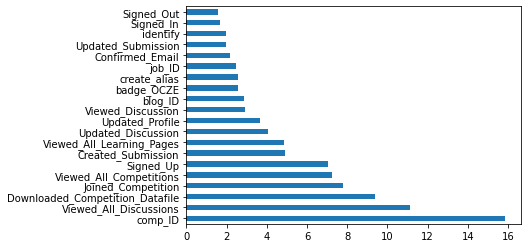

In [130]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [131]:
sub = pd.DataFrame({
    'User_ID_Next_month_Activity': test_df.User_ID,
    'Active': predictions
})

In [132]:
sub.Active.describe()

count    738.000000
mean       0.432786
std        0.155333
min        0.211876
25%        0.306844
50%        0.370835
75%        0.539946
max        0.904540
Name: Active, dtype: float64

In [133]:
sub["Active"]

0      0.310930
1      0.310758
2      0.853734
3      0.306688
4      0.343010
         ...   
733    0.604838
734    0.472600
735    0.237972
736    0.584016
737    0.317675
Name: Active, Length: 738, dtype: float64

In [134]:
sub.Active = sub.Active.apply(lambda x: 1 if x > 0.5 else 0)
sub.User_ID_Next_month_Activity = sub.User_ID_Next_month_Activity + '_Month_5'
sub

,User_ID_Next_month_Activity,Active
0,ID_ZZMHNLNT_Month_5,0
1,ID_ZWDD4T41_Month_5,0
2,ID_ZUVTLGY7_Month_5,1
3,ID_ZT27LY0Q_Month_5,0
4,ID_ZQM6PUGO_Month_5,0
...,...,...
733,ID_04OT901K_Month_5,1
734,ID_04GIS1QZ_Month_5,0
735,ID_02F14MDW_Month_5,0
736,ID_028JJTDW_Month_5,1


In [135]:
sub = pd.merge(SampleSubmission.drop(columns='Active'), sub, on='User_ID_Next_month_Activity', how='left').fillna(0)

In [136]:
sub.Active.value_counts()

0.0    1098
1.0     242
Name: Active, dtype: int64

In [137]:
sub.to_csv('submission2.csv', index=False)